In [1]:
%matplotlib inline
import pandas as pd

import numpy as np
from __future__ import division
import itertools

import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['axes.grid'] = False
plt.rcParams['figure.figsize'] = (10,16)

import logging
logger = logging.getLogger()

8 Advertising on the Web
=============

1. "adwords" model, search     
2. "collaborative filtering", suggestion

### 8.1 Issues in On-Line Advertising
#### 8.1.1 Advertising Opportunities
1. Auto trading sites allow advertisters to post their ads directly on the website.      

2. Display ads are placed on many Web sites.      

3. On-line stores show ads in many contexts.      

4. Search ads are placed among the results of a search query.

#### 8.1.2 Direct Placement of Ads
Which ones:      

1. in response to query terms.      

2. ask the advertiser to specify parameters of the ad, and queryers can use the same menus of terms in their queries.


How to rank:       

1. "most-recent first"      
   Abuse: post small variations of ads at frequent intervals. $\to$ Against: filter out similar ads.      
   
2. try to measure the attractiveness of an ad.      
   several factors that must be considered in evaluating ads:    
   
   + The position of the ad in a list has great influence on whether or not it is clicked.      
   
   + The ad may have attractiveness that depends on the query terms.
   
   + All ads deserve the opportunity to be shown until their click probability can be approximated closely.
   
   
#### 8.1.3 Issues for Display Ads
It's possible to use information about the user to determine which ad they should be shown. $\to$ privacy issues.

In [3]:
# exerices for section 8.1

### 8.2 On-Line Algorithms
#### 8.2.1 On-Line and Off-Line Algorithms
Off-Line: The algorithm can access all the data in any order, and produces its answer at the end.

On-Line: The algorithm must decide about each stream element knowing nothing at all of the future.

Since we don't know the future, an on-line algorithm cannot always do as well as an off-line algorithm.


#### 8.2.2 Greedy Algorithms
Greedy: make their decision in response to each input element by maximizing some function of the input element and the past.

might be not optimal.


#### 8.2.3 The Competitive Ratio
an on-line algorithm need not give as good a result as the best off-line algorithm for the same problem:      
particular on-line algorithm >= $C \times$ the optimum off-line algorithm, where $C \in (0,1)$ and is called the competitive ratio for the on-line algorithm.

The competitive ratio for an algorithm may depend on what kind of data is allowd to be input to the algorithm.

In [2]:
# exerices for section 8.2

### 8.3 The Matching Problem
bipartite graphs:     
graphs with two sets of nodes - left and right - with all edges connecting a node in the left set node to a node in the right set.

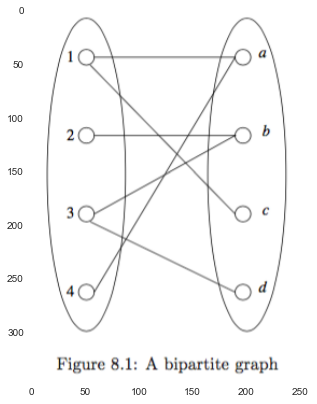

In [3]:
plt.figure(figsize=(5,8))
plt.imshow(plt.imread('./res/fig8_1.png'))

#### 8.3.1 Matches and Perfect Matches
matching: a *matching* is a subset of the edges such that no node is an end of two or more edges.

perfect matching: a matching is said to be *perfect* if every node appears in the matching.

maximal matching: a matching that is as large as any other matching for the graph in question is said to be *maximal*.

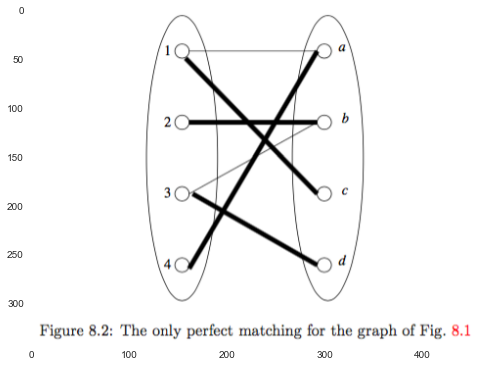

In [6]:
plt.figure(figsize=(8,8))
plt.imshow(plt.imread('./res/fig8_2.png'))

#### 8.3.2 The Greedy Algorithm for Maximal Matching
Off-line algorithm for finding a maximal matching: $O(n^2)$ for an $n$-node graph.

On-line greedy algorithm:      
We consider the edges in whatever order they are given.      
When we consider $(x,y)$, add this edge to the matching if neither $x$ nor $y$ are ends of any edge selected for the matching so far. Otherwise, skip $(x,y)$.

In [32]:
bipartite_graph = [('1', 'a'), ('1', 'c'), ('2', 'b'), ('3', 'b'), ('3', 'd'), ('4', 'a')]
bipartite_graph

[('1', 'a'), ('1', 'c'), ('2', 'b'), ('3', 'b'), ('3', 'd'), ('4', 'a')]

In [37]:
logger.setLevel('WARN')

def greedy_maximal_matching(connections):
    maximal_matches = np.array([connections[0]])
    logger.debug('maximal_matches: \n{}'.format(maximal_matches))
    for c in connections[1:]:
        logger.debug('c: {}'.format(c))
        if (c[0] not in maximal_matches[:,0]) and (c[1] not in maximal_matches[:,1]):
            maximal_matches = np.append(maximal_matches, [c], axis=0)
            logger.debug('maximal_matches: \n{}'.format(maximal_matches))
            
    return maximal_matches

from random import sample
connections = sample(bipartite_graph, len(bipartite_graph))
print('connections: \n{}'.format(connections))
greedy_maximal_matching(bipartite_graph)

connections: 
[('1', 'c'), ('4', 'a'), ('3', 'd'), ('3', 'b'), ('1', 'a'), ('2', 'b')]


array([['1', 'a'],
       ['2', 'b'],
       ['3', 'd']], 
      dtype='<U1')

#### 8.3.3 Competitive Ratio for Greedy Matching
**conclusion**: The competitive ratio is 1/2 exactly. 

The proof is as follows:

##### <= 1/2
The competitive ratio for the greedy matching cannot be more than 1/2, as shown in Example 8.6.

##### >= 1/2
The competitive ration is no more than 1/2.      

Proof:       

Suppose $M$ is bipartitle graph, $M_o$ is a maximal matching, and $M_g$ is the matching of the greedy algorithm.

Let $L = \{M_o.l - M_g.l\}$, and $R = \{r \ | (l,r) \in M; l \in L\}$

1. Lemma (0): $R \subset M_g.r$     

   Suppose $\forall r \in R, r\notin M_g.r$,      
   becase $\exists l \in L, (l,r) \in M$, so $(l,r) \in M_g$. $\implies$ conradiction. 
   
2. Lemma (1): $|M_o| \leq |M_g| + |L|$

   $|M_o| = |M_o.l| = |M_o.l \cap M_g.l| + |L| \leq |M_g| + |L|$
   
3. Lemma (2): $|L| \leq |R|$

   according to the definition of $R$, one-vs-many might exist.
   
4. Lemma (3): $|R| \leq |M_g|$

   according to Lemma (0).
   
Combine Lemma (2) and Lemma (3), we get $|L| \leq |M_g|$. And together with Lemma (1), gives us $|M_o| \leq 2|M_g|$, namely,$$|M_g| \geq \frac{1}{2}|M_o|$$.

#### Exercises for Section 8.3
##### 8.3.1
1. $j$ and $k$ cannot be the same for any $i$.

2. The number of node in $a$ linked to $b_j$ is no more than 2.

   Proof:      
   because $i = 0, 1, \dotsc, n-1$,    
   so $j \in [0, 2, \dotsc, 2n-2] \text{ mod } n$. 
   
   hence $j$ is no more than $2n = 2*n$, namely, there are only two node in $a$ can link to any $b_j$.
   
3. The number of node in $a$ linked to $b_k$ is no more than 2.
   Proof is similar with (2).
   
In all, there are only two node in $a$ can link to any node in $b$. So assign $b$ to $a$ one by one, the peferct matching always exists. 

##### 8.3.2
Because any node in $b$ has only two links, and also any node in $a$ has only two links. And for any $j$, there has one $k$ paired. Namely, two node of $a$ is full linked to two node of $b$.

num: $n$.

##### 8.3.3
(1) depend on the order of edges.

In [49]:
#(2)
from itertools import permutations

stat = []
for connections in permutations(bipartite_graph, len(bipartite_graph)):
    stat.append(greedy_maximal_matching(connections).shape[0])
    
pd.Series(stat).value_counts()

4    320
3    320
2     80
dtype: int64

### 8.4 The Adwords Problem
#### 8.4.1 History of Search Advertsing
1. Google would show only a limited number of ads with each query.

2. Users of the Adwords system specified a budge.

3. Google did not simply order ads by the amount of the bid, but by the amount they expected to receive for display of each ad.

#### 8.4.2 Definition of the Adwords Problem
Given:

1. A set of bids by advertisers for search queries.

2. A click-through rate for each advertiser-query pair.

3. A budge for each advertiser.

4. A limit on the nuber of ads to be displayed with each search query.

Respond to each search query with a set of advertisers such that:

1. The size of the set is no larger than the limit on the number of ads per query.

2. Each advertiser has bid on the search query.

3. Each advertiser has enough budget left to pay for the ad if it is clicked upon.

The **revenue** of a selection of ads is the total value of the ads selected, where the **value** of an ad is the product of the bid and the click-through rate for the ad and query.

#### 8.4.3 The Greedy Approach to the Adwords Problem
Make some simplifications:

+ There is one ad shown for each query.

+ All advertisers have the same budget.

+ All click-through rates are the same.

+ All bids are either 0 or 1.

The greddy algorithm picks, for each search query, any advertiser who has bid 1 for that query.

competitive ratio for this algorithm is 1/2. It's similar with 8.3.3.

#### 8.4.4 The Balance Algorithm
The Balance algorithm assigns a query to the advertiser who bids on the query and has the largest remaining budget.

#### 8.4.5 A Lower Bound on Competitive Ratio for Balance
With only two advertisers, $3/4$ is exactly the competitive ratio.

Let two advertisers $A_1$ and $A_2$ have a same budget of $B$. We assume:

1. each query is assigned to an advertiser by the optimum algorithm.      
   if not, we can delete those queries without affecting the revenue of the optimum algorithm and possibly reducing the revenue of Balance.
   
2. both advertisers' budgets are consumed by the optimum algorithm.     
   If not, we can reduce the budgets, and again argue that the revenue of the optimum algorithm is not reduced while that of Balance can only shrink.

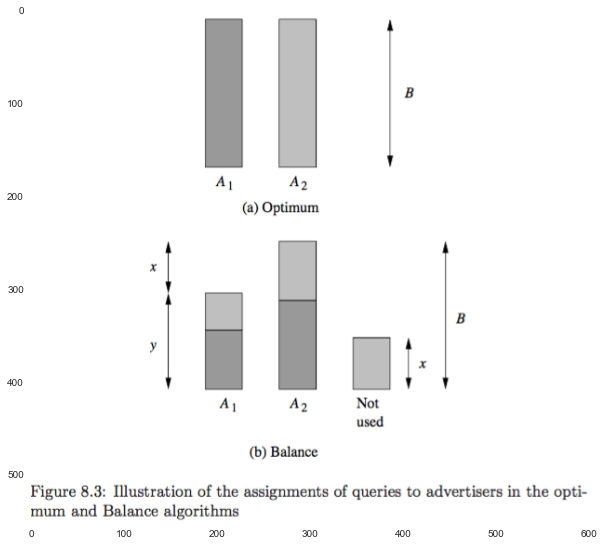

In [2]:
plt.imshow(plt.imread('./res/fig8_3.png'))

In fig 8.3, observe that Balance must exhaust the budget of at least one of the advertisers, say $A_2$.

If the revenue of Balance is at least $3/4$th the revenue of the optimum algorithm, we need to show $y \geq x$.

There are two cases that the queries that are assigned to $A_1$ by the optimum algorithm are assigned to $A_1$ or $A_2$ by Balance:

1. Suppose at least half of these queries are assigned by Balance to $A_1$. Then $y \geq B/2$, so surely $y \geq x$.

2. Suppose more than half of these queries are assigned by Balance to $A_2$.    
   Why dose Balance assgin them to $A_2$, instead of $A_1$ like the optimum algorithm? Because $A_2$ must have had at least as great a budget available as $A_1$.      
   Since more than half of the $B$ queries that the optimum algorithm assigns to $A_1$ are assigned to $A_2$ by Balance, so the remaining budget of $A_2$ was less than $B/2$.     
   Thus, the remaining budget of $A_1$ was laso less than $B/2$. We know that $x < B/2$.      
   It follows that $y > x$, since $x + y = B$.
   
We conclude that $y \geq x$ in either case, so the competitve ratio of the Balance Algorithm is $3/4$.

#### 8.4.6 The Balance Algorithm with Many Bidders
The worst case for Balance is as follows:

1. There are $N$ advertisers, $A_1, A_2, \dotsc, A_N$.

2. Each advertiser has a budge $B = N!$.

3. There are $N$ queries $q_1, q_2, \dotsc, q_N$.

4. Advertiser $A_i$ bids on queries $q_1, q_2, \dotsc, q_i$ and no other queries.

5. The query sequence consists of $N$ rounds. The $i$th round consists of $B$ occurrences of query $q_i$ and nothing else.

The optimum off-line algorithm assigns the $B$ queries $q_i$ in the $i$th round to $A_i$ for all $i$. Its total revenue is $NB$.

However, for the Balance Algorithm, 

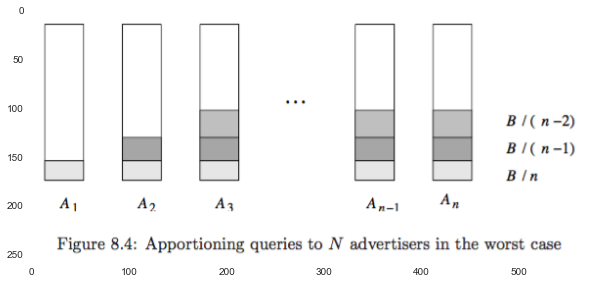

In [3]:
plt.imshow(plt.imread('./res/fig8_4.png'))

Lower-numbered advertisers cannot bid at first, and the budgets of hte higher-numbered advertisers will be exhausted eventually. All advertisers will end at $j$ round where 
$$B(\frac{1}{N} + \frac{1}{N-1} + \dotsb + \frac{1}{N-j+1}) \geq B$$
Solving this equation for $j$, we get $$j = N(1 - \frac{1}{e})$$
Thus, the approxiamte revenue obtained by the Balance Algorithm is $BN(1 - \frac{1}{e})$. Therefore, the competitive ration is $1 - \frac{1}{e}$.

#### 8.4.7 The Generalized Balance Algorithm
With arbitrary bids and budgets Balance fails to weight the sizes of the bids properly. In order to make Balance work in more general situations, we need to make two modifications:

1. bias the choice of ad in favor of higher bids.

2. use the fraction of the budgets remaining.

We calculate $\Phi_i = x_i (1 - e^{-f_i})$, where $x_i$ is the bid of $A_i$ for the query, and $f_i$ is the fraction fo the unspent budget of $A_i$. The algorithm assignes the query to $\text{argmax} \Phi_i$. 

The competitive ration is $1 - \frac{1}{e}$.

#### 8.4.8 Final Observations About the Adwords Problem
1. click-through rate.       
   multiply the bid by the click-through rate when computing the $\Phi_i$'s.
   
2. historical frequency of queries.      
   If $A_i$ has a budget sufficiently small, then we maintain $\Phi_i$ as long as we can expect that there will be enough queries remaining in the month to give $A_i$ its full budget of ads. 

#### Exercises  for Section 8.4
`#maybe`

### 8.5 Adwords Implementation
#### 8.5.1 Matching Bids and Search Queries
If a search query occurs having exactly that set of words in some order, then the bid is said to match the query, and it becomes a candidate for selection.

Storing all sets of words representing a bid in lexicographic(alphabetic) order, and use it as the hash-key for the bid.

In [22]:
class advertiser:
    def __init__(self, name, bids):
        self.name = name
        self.bids = bids
    def get_info(self):
        return self.name, self.bids

advertisers = [
    advertiser('David', ['Google', 'email', 'product']),
    advertiser('Jim', ['SNS', 'Facebook', 'product']),
    advertiser('Sun', ['product', 'Google', 'email']),
]

bids_hash_table = dict()
for ad in advertisers:
    v, k = ad.get_info()
    k = [x.lower() for x in k]
    k = ' '.join(sorted(k))
    if k not in bids_hash_table: 
        bids_hash_table[k] = [v]
    else:
        bids_hash_table[k].append(v)
        
bids_hash_table

{'email google product': ['David', 'Sun'], 'facebook product sns': ['Jim']}

In [29]:
queries = [
    ('EMAIL', 'google', 'Product'),
    ('google', 'facebook', 'Product')
]

def handle_query(query):
    q = [x.lower() for x in query]
    q = ' '.join(sorted(q))
    print(q)
    try:
        print('Found: {}'.format(bids_hash_table[q]))
    except KeyError:
        print('No bids')   
        
for query in queries: 
    handle_query(query)
    print()

email google product
Found: ['David', 'Sun']

facebook google product
No bids



#### 8.5.2 More Complex Matching Problems
0. Hard: Matches adwords bids to emails.    
   a bid on a set of words $S$ matches an email if all the words in $S$ appear anywhere in the email.

1. Easy: Matching single words or consecutive sequences of words in a long article      
   On-line news sites often push certain news or articles to users who subscribed by keywords or phrases.

#### 8.5.3 A Matching Algorithm for Documents and Bids
match many "bids" against many "documents".

A *bid* is a (typically small) set of words.     
A *document* is a larger set of words, such as email, tweet, or news article.     
We assume there may be hundrends of documents per second arriving, and there are many bids, perhaps on the order of a hundred million or a billion.

###### representing a bid by its words listed in some order
1. status: It is an integer indicating how many of the first words on the list have been matched by the current document.

2. ordering words rarest-first.       
   + We might identify the $n$ most common words are sorted by frequency, and they occupy the end of the list, with the most frequent words at the very end.      
   + All words not among the $n$ most frequent can be assumed equally infrequent and ordered lexicographically. 

In [51]:
n_common_words = {'the': 0.9, 'and': 0.8, 'twas': 0.3}

def construct_document(doc):
    doc = doc.replace(',','').lower().split(' ')
    com = set(doc).intersection(set(n_common_words.keys()))
    diff = set(doc).difference(set(n_common_words.keys()))
    
    freq = [n_common_words[x] for x in com]
    
    freq_sec = [x for (y,x) in sorted(zip(freq, com))]
    rare_sec = sorted(diff)
    sec = ' '.join(rare_sec + freq_sec)
    print(sec)
    
doc = 'Twas brilling, and the slithy toves'
construct_document(doc)

brilling slithy toves twas and the


The bids are stored in a hash-table, whose hash key is the first word of the bid, in the order explained above.

There is another hash table, whose job is to contain copies of those bids that have been partially matched. If the status is $i$, then the hash-key for this hash table is the $(i + 1)$st word.

To process a document:

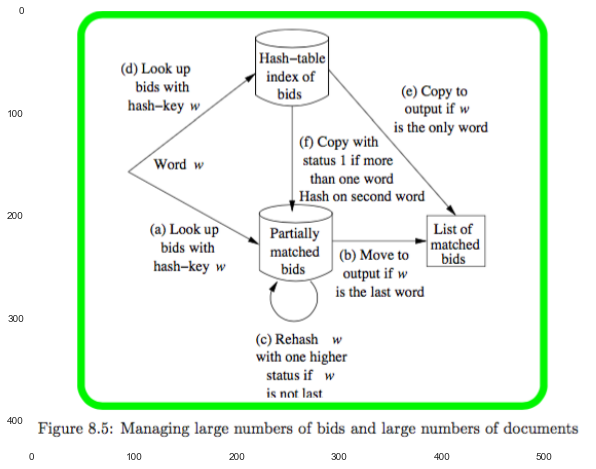

In [52]:
plt.imshow(plt.imread('./res/fig8_5.png'))

按序依次取词，将哈希命中的标单，用其下一词再构建哈希表用于检索，直到全部词命中后剩下的标单，即为候选。

具体步骤见书中。